<a href="https://colab.research.google.com/github/Duydeptrai20/colab/blob/main/nhandanghoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from numpy import asarray
from numpy import save
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [3]:
folder = '/content/drive/MyDrive/hoa/cuc' #0
folder1='/content/drive/MyDrive/hoa/mt' #1
folder2='/content/drive/MyDrive/hoa/td' #2
folder3='/content/drive/MyDrive/hoa/vt' #3


folders=[folder,folder1,folder2,folder3]
photos, labels = list(), list()
for i in range (4):
  for file in listdir(folders[i]):
    output=i

    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('flower_photos.npy',photos)
save('flower_labels.npy',labels)

(69, 100, 100, 3) (69,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [5]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [10]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [11]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(10, activation='Softmax'))

In [12]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.0551 - accuracy: 0.2083 - val_loss: 18.4164 - val_accuracy: 0.1905
Epoch 2/100
1/1 [==============================] - 1s 792ms/step - loss: 14.0839 - accuracy: 0.3750 - val_loss: 7.0574 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 1s 781ms/step - loss: 8.0577 - accuracy: 0.2708 - val_loss: 2.0631 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 1s 775ms/step - loss: 2.0406 - accuracy: 0.2083 - val_loss: 2.0420 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 1s 800ms/step - loss: 1.9776 - accuracy: 0.2083 - val_loss: 1.9279 - val_accuracy: 0.4762
Epoch 6/100
1/1 [==============================] - 1s 752ms/step - loss: 1.8185 - accuracy: 0.3333 - val_loss: 1.8310 - val_accuracy: 0.3810
Epoch 7/100
1/1 [==============================] - 1s 758ms/step - loss: 1.7083 - accuracy: 0.3125 - val_loss: 1.7569 - val_accuracy: 0.3810
Epoch 8/100
1/

array([1])

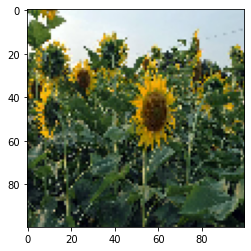

In [14]:
from keras.preprocessing import image
pic = image.load_img('/content/test_hoamattroi.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#hoa cuc(0), hoa_mat_troi(1), hoa_thuoc_duoc(2), hoa_van_tho(3)

array([2])

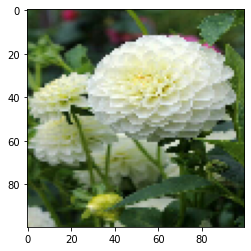

In [15]:
from keras.preprocessing import image
pic = image.load_img('/content/test_hoathuocduoc.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#hoa cuc(0), hoa_mat_troi(1), hoa_thuoc_duoc(2), hoa_van_tho(3)

array([0])

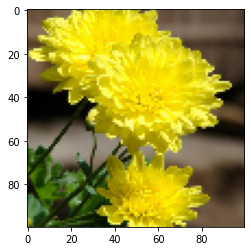

In [17]:
from keras.preprocessing import image
pic = image.load_img('/content/test_hoa_cuc.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#hoa cuc(0), hoa_mat_troi(1), hoa_thuoc_duoc(2), hoa_van_tho(3)

In [ ]:
#link dữ liệu: https://drive.google.com/drive/u/0/folders/1Svo4C3YHZUD9W4jRlhFsD_vpwrqnw02f  